In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv

from numpy import mean
from numpy import std

from collections import Counter

from matplotlib import pyplot

### 1. Credit Card Fraud Dataset

In [ ]:
creditcard = pd.read_csv('creditcard.csv')

### 2. Explore the Dataset

In [ ]:
# summarize the shape of the dataset
print(creditcard.shape)

In [ ]:
creditcard.head()

In [ ]:
# summarize the class distribution
target = creditcard.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

In [ ]:
# load the csv file as a data frame
df = pd.read_csv('creditcard.csv')
# drop the target variable
df = df.drop('Class', axis=1)

In [ ]:
df.head()

In [ ]:
# create a histogram plot of each numeric variable
ax = df.hist(bins=100)
# disable axis labels to avoid the clutter
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])
# show the plot
pyplot.show()

In [ ]:
# summarize the amount variable.
print(df['Amount'].describe())

### 3. Model Test and Baseline Result

In [ ]:
# test harness and baseline model evaluation for the credit dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

In [ ]:
# load the dataset as a numpy array
data = read_csv('creditcard.csv')

In [ ]:
data.head()

In [ ]:
# retrieve numpy array
data = data.values

In [ ]:
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

In [ ]:
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

In [ ]:
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
X

In [ ]:
# calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
	# calculate precision-recall curve
	p, r, _ = precision_recall_curve(y_true, probas_pred)
	# calculate area under curve
	return auc(r, p)

In [ ]:
# define the model evaluation the metric
metric = make_scorer(pr_auc, needs_proba=True)

In [ ]:
# evaluate model
scores = cross_val_score(model, X, y,scoring=metric, cv=cv)

In [ ]:
# summarize performance
print('Mean PR AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

In [1]:
# test harness and baseline model evaluation for the credit dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

In [2]:
# load the dataset as a numpy array
data = read_csv('creditcard.csv')

In [3]:
# retrieve numpy array
data = data.values

In [4]:
data

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

In [5]:
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [6]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [7]:
# calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
	# calculate precision-recall curve
	p, r, _ = precision_recall_curve(y_true, probas_pred)
	# calculate area under curve
	return auc(r, p)

In [8]:
# define the model evaluation the metric
metric = make_scorer(pr_auc, needs_proba=True)

In [9]:
# evaluate model
scores = cross_val_score(model, X, y,scoring=metric, cv=cv)

In [10]:
# summarize performance
print('Mean PR AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean PR AUC: 0.501 (0.000)


### 4. Evaluate Models

The model does not have a way of optimizing the hyperparameters, keep that in mind

- Decision Tree (CART)
- k-Nearest Neighbors (KNN)
- Bagged Decision Trees (BAG)
- Random Forest (RF)
- Extra Trees (ET)

In [11]:
# spot check machine learning algorithms on the credit card fraud dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [16]:
# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	return X, y

In [17]:
# define the location of the dataset
full_path = 'creditcard.csv'
# load the dataset
X, y = load_dataset(full_path)

In [18]:
# define models to test
def get_models():
	models, names = list(), list()
	# CART
	models.append(DecisionTreeClassifier())
	names.append('CART')
	# KNN
	steps = [('s',StandardScaler()),('m',KNeighborsClassifier())]
	models.append(Pipeline(steps=steps))
	names.append('KNN')
	# Bagging
	models.append(BaggingClassifier(n_estimators=100))
	names.append('BAG')
	# RF
	models.append(RandomForestClassifier(n_estimators=100))
	names.append('RF')
	# ET
	models.append(ExtraTreesClassifier(n_estimators=100))
	names.append('ET')
	return models, names

In [19]:
# define models
models, names = get_models()
results = list()

In [20]:
# calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
	# calculate precision-recall curve
	p, r, _ = precision_recall_curve(y_true, probas_pred)
	# calculate area under curve
	return auc(r, p)

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# define the model evaluation the metric
	metric = make_scorer(pr_auc, needs_proba=True)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores

In [21]:
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(X, y, models[i])
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>CART 0.759 (0.037)
>KNN 0.869 (0.042)
>BAG 0.845 (0.049)
>RF 0.853 (0.046)
>ET 0.862 (0.045)


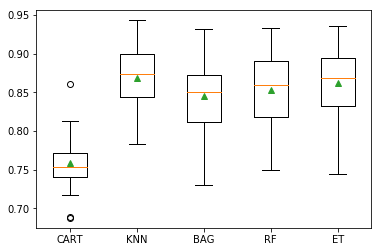

In [22]:
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### 5. Make Predictions on New Data

In [ ]:
# define model to evaluate
model = KNeighborsClassifier()
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])

In [ ]:
# fit the model
pipeline.fit(X, y)

In [ ]:
# define a row of data
row = [...]
yhat = pipeline.predict_proba([row])
# get the probability for the positive class
result = yhat[0][1]